# Postprocessing Notebook for Stage

In [1]:
#interactive widget requires pip install ipympl  
%matplotlib widget
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [2]:
df1 = pd.read_csv("./simulations/tb_stage_corners_tt.txt", sep='\s+')
df2 = pd.read_csv("./simulations/tb_stage_corners_ss.txt", sep='\s+')
df3 = pd.read_csv("./simulations/tb_stage_corners_ff.txt", sep='\s+')

In [3]:
df1

,time,p2e,vout
0,0.000000e+00,7.726580e-08,0.545842
1,1.000000e-12,7.726533e-08,0.545842
2,2.000000e-12,7.726505e-08,0.545842
3,4.000000e-12,7.726475e-08,0.545842
4,8.000000e-12,7.726488e-08,0.545842
...,...,...,...
2699,2.396716e-07,7.726580e-08,0.821838
2700,2.397716e-07,7.726580e-08,0.821838
2701,2.398716e-07,7.726580e-08,0.821838
2702,2.399716e-07,7.726580e-08,0.821837


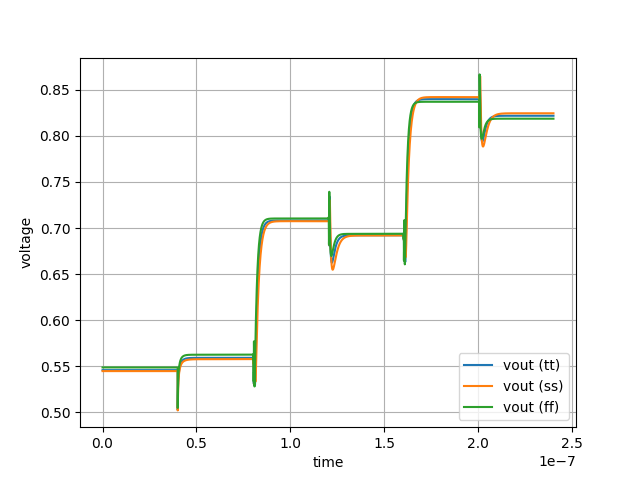

In [4]:
t1 = df1['time'].values
t2 = df2['time'].values
t3 = df3['time'].values
vout1 = df1['vout'].values
vout2 = df2['vout'].values
vout3 = df3['vout'].values

plt.figure(1)
plt.clf()
plt.plot(t1, vout1, label="vout (tt)")
plt.plot(t2, vout2, label="vout (ss)")
plt.plot(t3, vout3, label="vout (ff)")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

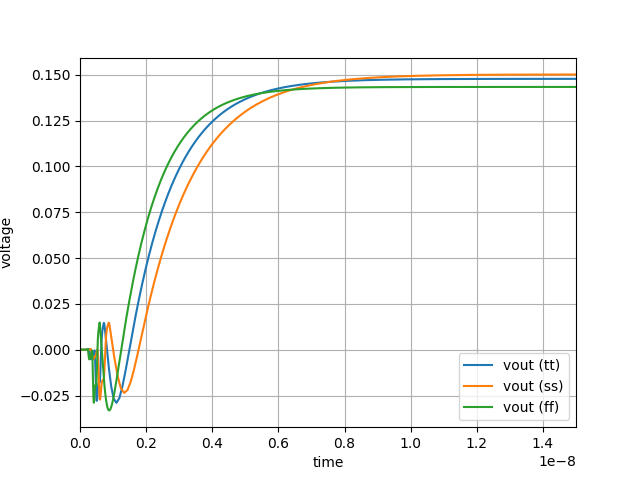

In [5]:
idx1 = np.where(np.logical_and(t1>=160e-9, t1<=2e-7))
idx2 = np.where(np.logical_and(t2>=160e-9, t2<=2e-7))
idx3 = np.where(np.logical_and(t3>=160e-9, t3<=2e-7))
t10 = t1[idx1]-t1[idx1][0]
t20 = t2[idx2]-t2[idx2][0]
t30 = t3[idx3]-t3[idx3][0]
vout10 = vout1[idx1]-vout1[idx1][0]
vout20 = vout2[idx2]-vout2[idx2][0]
vout30 = vout3[idx3]-vout3[idx3][0]

plt.figure(2)
plt.clf()
plt.plot(t10, vout10, label="vout (tt)")
plt.plot(t20, vout20, label="vout (ss)")
plt.plot(t30, vout30, label="vout (ff)")
plt.xlim(0, 1.5e-8)
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

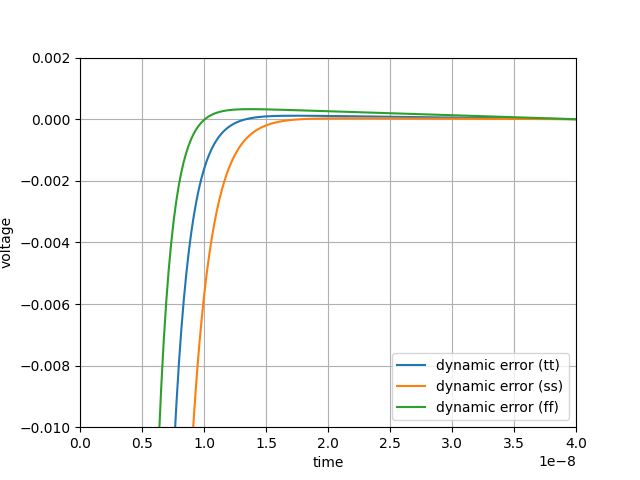

In [6]:
dyn_err1 = (vout10 - vout10[-1]) / vout10[-1]
dyn_err2 = (vout20 - vout20[-1]) / vout20[-1]
dyn_err3 = (vout30 - vout30[-1]) / vout30[-1]

plt.figure(3)
plt.clf()
plt.plot(t10, dyn_err1, label="dynamic error (tt)")
plt.plot(t20, dyn_err2, label="dynamic error (ss)")
plt.plot(t30, dyn_err3, label="dynamic error (ff)")
plt.xlim(0, 4e-8)
plt.ylim(-1e-2, 0.2e-2)
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()
 

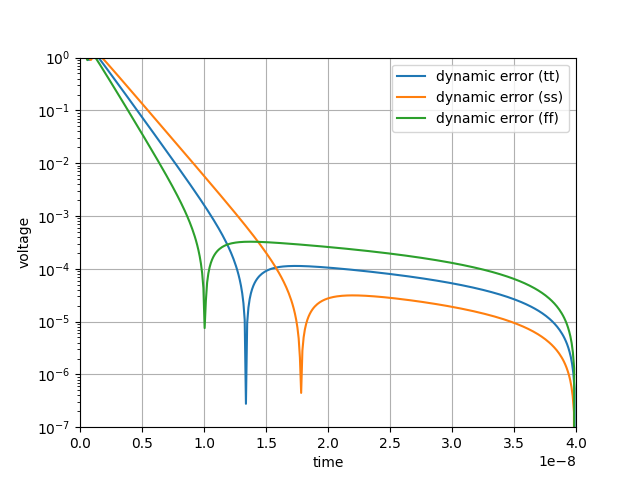

In [7]:
plt.figure(4)
plt.clf()
plt.plot(t10, abs(dyn_err1), label="dynamic error (tt)")
plt.plot(t20, abs(dyn_err2), label="dynamic error (ss)")
plt.plot(t30, abs(dyn_err3), label="dynamic error (ff)")
plt.yscale("log")
plt.xlim(0, 4e-8)
plt.ylim(1e-7, 1)
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="upper right")
plt.grid()
plt.show()